
"""

Filters the raw base for creating a cleaner "Dataset_base"


"""


# Import the code 


In [1]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [2]:

class Data(object):
    pass

df = Data
summ = Data


In [3]:
import helpdesk as hd

In [4]:

import pandas as pd, numpy as np
from datetime import datetime


In [5]:
DEBUG = True

In [6]:
pd.set_option('display.max_rows', 50);

In [7]:
pd.set_option('display.max_columns', 50);

In [8]:
pd.set_option('display.width', 200);

In [9]:

doglevel = ['@id_DOG']


In [10]:

#df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2022-12-03.csv', parse_dates = True)
df.ft_raw = pd.read_csv(f'{fileloc}/raw_base_2023-02-09.csv', parse_dates = True)

print(df.ft_raw.shape)
print(df.ft_raw.columns.values.tolist())

# 588017 records


(641710, 45)
['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [11]:

print(df.ft_raw.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [12]:

# Find the Places to be removed
print( pd.DataFrame(df.ft_raw['Place'].value_counts()).transpose() )


           1      2      5      3      4      6      7      8   3=   4=   2=   5=   1=   6=   7=
Place  88758  88519  88461  88425  88409  82756  66932  46750  520  512  474  419  338  303  134


In [13]:

print( pd.DataFrame(df.ft_raw['position'].value_counts()).transpose() )


              1      2      3      4      5      6      7      8
position  89096  88993  88945  88921  88880  83059  67066  46750


In [14]:

df_base_fo_grading = df.ft_raw.copy()


In [15]:

df_base_fo_grading.sort_values(by = ['@id_DOG', 'DogName', 'Event_Dt'], inplace = True)


In [16]:

#df_base0[df_base0.DogName.isin(['FOURTH DIMENTION'])].head()
df_base_fo_grading[df_base_fo_grading['@id_RACE'].isin([631783547]) ]


,@id_DOG,Place,DogName,Box,Rug,Weight,StartPrice,Handicap_DOG,Margin1,Margin2,PIR,Checks,Comments,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,TrainerName,RaceBox,Rating,DogGrade,DogGOBIS,DogPRIZE,@id_RACE,RaceNum,RaceName,RaceTime,Distance,RaceGrade,Track,date,Event_Dt,RaceTimeDateUTC,GOBIS,Hurdle,Handicap_RACE,TAB,GradeCode,racetime_fix,ft_sp,x_num_dogs,position,y_margin,y_pos
70,114244064,2,FOURTH DIMENTION,3.0,3,33.4,$4.20,NaN,0.39,0.39,M/22,1,NaN,8.36,22.75,NaN,631783547,131578,P Pollutro,3.0,97.0,5,N,21880.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,4.2,8,2,0.39,2
2037,157829531,3,TUI,4.0,4,29.3,$8.50,NaN,3.60,3.21,M/43,4,NaN,8.47,22.97,NaN,631783547,110965,C Haigh,4.0,98.0,5,N,10128.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,8.5,8,3,3.60,3
2305,164415675,6,BIG PLANS,2.0,2,39.7,$9.10,NaN,8.80,1.21,M/68,0,NaN,8.62,23.34,NaN,631783547,255489,K Thorburn,2.0,91.0,5,N,4930.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,9.1,8,6,8.80,6
3154,184236240,5,CEE JAY ACE,1.0,1,33.0,$2.80F,NaN,7.59,2.23,S/86,1,NaN,8.73,23.25,NaN,631783547,283109,L Dalziel,1.0,100.0,5,N,24820.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,2.8,8,5,7.59,5
3427,190918076,4,BANJO PLATO,8.0,8,33.1,$14.10,NaN,5.36,1.76,S/75,0,NaN,8.64,23.10,NaN,631783547,65076,D Belsham,8.0,95.0,5,N,5435.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.1,8,4,5.36,4
8479,224008138,7,HEIDI INTENTION,7.0,7,25.7,$6.20,NaN,14.94,6.14,M/57,11,NaN,8.48,23.77,NaN,631783547,27599,J Caley,7.0,100.0,5,N,8970.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,6.2,8,7,14.94,7
47559,314053857,1,PARUMBA BARCIA,6.0,6,30.2,$14.50,NaN,0.39,NaN,M/11,1,NaN,8.29,22.72,NaN,631783547,132501,E Lieshout,6.0,97.0,5,N,3645.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,14.5,8,1,0.39,1
88215,340020191,8,HURRICANE PETE,5.0,5,32.7,$18.10,NaN,16.19,1.24,M/34,15,NaN,8.43,23.85,NaN,631783547,69852,J Sultana,5.0,91.0,5,N,3685.0,631783547,7,TAB - LONG MAY WE PLAY,05:15PM,400m,Grade 5 T3,Warragul,14 Jan 21,2021-01-14,14 Jan 21 06:15AM,NaN,NaN,NaN,3RD LEG QUAD TRI/QUIN R/D EXACTA PICK4,T3-5,17:15:00,18.1,8,8,16.19,8


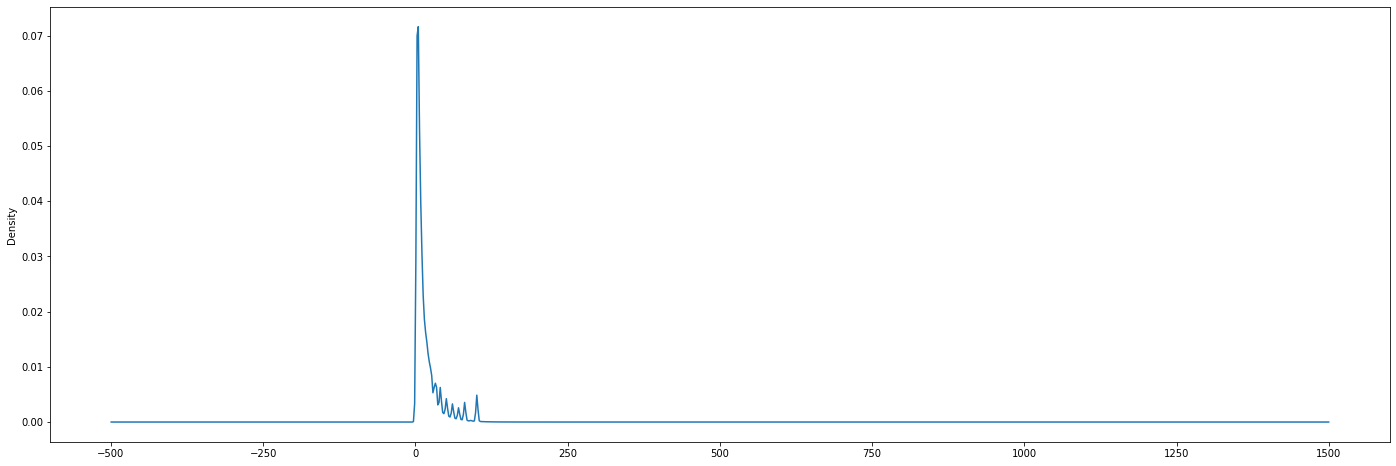

In [17]:

df_base_fo_grading['ft_sp'].plot(kind = 'density', figsize = (24,8))


In [18]:

print(df_base_fo_grading.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos']


In [19]:

display(df_base_fo_grading.DogGrade.value_counts())


5    278346
M    103677
7     92941
6     71158
4     55974
3     21020
1      9834
2      8760
Name: DogGrade, dtype: int64

In [20]:

df_base_fo_grading.dtypes


@id_DOG              int64
Place               object
DogName             object
Box                float64
Rug                  int64
Weight             float64
StartPrice          object
Handicap_DOG       float64
Margin1            float64
Margin2            float64
PIR                 object
Checks               int64
Comments            object
SplitMargin        float64
y_runtime          float64
Prizemoney         float64
RaceId               int64
TrainerId            int64
TrainerName         object
RaceBox            float64
Rating             float64
DogGrade            object
DogGOBIS            object
DogPRIZE           float64
@id_RACE             int64
RaceNum              int64
RaceName            object
RaceTime            object
Distance            object
RaceGrade           object
Track               object
date                object
Event_Dt            object
RaceTimeDateUTC     object
GOBIS              float64
Hurdle             float64
Handicap_RACE      float64
T

In [21]:

# DogGrade
df_base_fo_grading['dg'] = df_base_fo_grading['DogGrade'].apply(lambda x : 8 if x == 'M' else int(x*1))

print(df_base_fo_grading['dg'].value_counts())
print(df_base_fo_grading['dg'].dtypes)


5    278346
8    103677
7     92941
6     71158
4     55974
3     21020
1      9834
2      8760
Name: dg, dtype: int64
int64


In [22]:

df_base_fo_grading['dg_prev'] = df_base_fo_grading.groupby(doglevel)['dg'].shift(1)
df_base_fo_grading['dg_prev'].fillna(-1, inplace = True)

print(df_base_fo_grading['dg_prev'].dtypes)
print(df_base_fo_grading['dg_prev'].value_counts(dropna = False))


float64
 5.0    266432
 8.0     98128
 7.0     89002
 6.0     68313
 4.0     53714
-1.0     28191
 3.0     20115
 1.0      9436
 2.0      8379
Name: dg_prev, dtype: int64


In [23]:

df_base_fo_grading['firstrace'] = df_base_fo_grading.apply(lambda x : 1 if x.dg_prev == -1 else 0, axis = 1)


In [24]:

display(df_base_fo_grading['firstrace'].value_counts())


0    613519
1     28191
Name: firstrace, dtype: int64

In [25]:

df_base_fo_grading['upgrade'] = df_base_fo_grading.apply(lambda x : 1 if x.dg < x.dg_prev else 0, axis = 1)

df_base_fo_grading['downgrade'] = df_base_fo_grading.apply(lambda x : 1 if x.dg > x.dg_prev else 0, axis = 1)


In [26]:

upg = df_base_fo_grading.groupby(['dg_prev','dg','upgrade']).agg( {'@id_DOG':'count'} ).unstack(level = 2)

display(upg)


@id_DOG         
upgrade           0        1
dg_prev dg                  
-1.0    1     165.0      NaN
        2     137.0      NaN
        3     317.0      NaN
        4     804.0      NaN
        5    4123.0      NaN
...             ...      ...
 8.0    4       NaN    457.0
        5       NaN   1771.0
        6       NaN    386.0
        7       NaN  13767.0
        8   81327.0      NaN

[61 rows x 2 columns]

In [27]:

downg = df_base_fo_grading.groupby(['dg_prev','dg','downgrade']).agg( {'@id_DOG':'count'} ).unstack(level = 2)

display(downg)


@id_DOG        
downgrade         0       1
dg_prev dg                 
-1.0    1       NaN   165.0
        2       NaN   137.0
        3       NaN   317.0
        4       NaN   804.0
        5       NaN  4123.0
...             ...     ...
 8.0    4     457.0     NaN
        5    1771.0     NaN
        6     386.0     NaN
        7   13767.0     NaN
        8   81327.0     NaN

[61 rows x 2 columns]

In [28]:

df_base_fo_grading['upg_87'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 7) & (x.dg_prev == 8) else 0, axis = 1)
df_base_fo_grading['upg_76'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 6) & (x.dg_prev == 7) else 0, axis = 1)
df_base_fo_grading['upg_65'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 5) & (x.dg_prev == 6) else 0, axis = 1)
df_base_fo_grading['upg_54'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 4) & (x.dg_prev == 5) else 0, axis = 1)
df_base_fo_grading['upg_43'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 3) & (x.dg_prev == 4) else 0, axis = 1)
df_base_fo_grading['upg_32'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 2) & (x.dg_prev == 3) else 0, axis = 1)
df_base_fo_grading['upg_21'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg == 1) & (x.dg_prev == 2) else 0, axis = 1)


In [29]:

print(df_base_fo_grading['upg_87'].value_counts())
print()
print(df_base_fo_grading['upg_76'].value_counts())
print()
print(df_base_fo_grading['upg_65'].value_counts())
print()
print(df_base_fo_grading['upg_54'].value_counts())
print()
print(df_base_fo_grading['upg_43'].value_counts())
print()
print(df_base_fo_grading['upg_32'].value_counts())
print()
print(df_base_fo_grading['upg_21'].value_counts())


0    627943
1     13767
Name: upg_87, dtype: int64

0    630518
1     11192
Name: upg_76, dtype: int64

0    632089
1      9621
Name: upg_65, dtype: int64

0    618349
1     23361
Name: upg_54, dtype: int64

0    636333
1      5377
Name: upg_43, dtype: int64

0    639715
1      1995
Name: upg_32, dtype: int64

0    640485
1      1225
Name: upg_21, dtype: int64


In [30]:

df_base_fo_grading['dng_12'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 1) & (x.dg == 2) else 0, axis = 1)
df_base_fo_grading['dng_23'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 2) & (x.dg == 3) else 0, axis = 1)
df_base_fo_grading['dng_34'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 3) & (x.dg == 4) else 0, axis = 1)
df_base_fo_grading['dng_45'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 4) & (x.dg == 5) else 0, axis = 1)
df_base_fo_grading['dng_56'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 5) & (x.dg == 6) else 0, axis = 1)
df_base_fo_grading['dng_67'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 6) & (x.dg == 7) else 0, axis = 1)
df_base_fo_grading['dng_78'] = df_base_fo_grading.apply(lambda x : 1 if (x.dg_prev == 7) & (x.dg == 8) else 0, axis = 1)


In [31]:

print(df_base_fo_grading['dng_12'].value_counts())
print()
print(df_base_fo_grading['dng_23'].value_counts())
print()
print(df_base_fo_grading['dng_34'].value_counts())
print()
print(df_base_fo_grading['dng_45'].value_counts())
print()
print(df_base_fo_grading['dng_56'].value_counts())
print()
print(df_base_fo_grading['dng_67'].value_counts())
print()
print(df_base_fo_grading['dng_78'].value_counts())



0    640764
1       946
Name: dng_12, dtype: int64

0    640349
1      1361
Name: dng_23, dtype: int64

0    637370
1      4340
Name: dng_34, dtype: int64

0    620703
1     21007
Name: dng_45, dtype: int64

0    641682
1        28
Name: dng_56, dtype: int64

0    641690
1        20
Name: dng_67, dtype: int64

0    641516
1       194
Name: dng_78, dtype: int64


#### Understanding the Dataset before export 

In [32]:

df_base_fo_grading.describe()


,@id_DOG,Box,Rug,Weight,Handicap_DOG,Margin1,Margin2,Checks,SplitMargin,y_runtime,Prizemoney,RaceId,TrainerId,RaceBox,Rating,DogPRIZE,@id_RACE,RaceNum,GOBIS,Hurdle,Handicap_RACE,ft_sp,x_num_dogs,position,y_margin,y_pos,dg,dg_prev,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
count,6.417100e+05,641710.000000,641710.000000,641709.000000,0.0,641710.000000,552614.000000,641710.000000,534962.000000,641710.000000,441507.000000,6.417100e+05,641710.000000,639849.000000,641710.000000,6.398490e+05,6.417100e+05,641710.000000,0.0,0.0,0.0,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000
mean,4.716331e+08,4.477842,4.585492,29.935242,NaN,6.468379,2.066496,0.482101,7.274142,24.376636,429.389620,7.486843e+08,110851.114122,4.585473,81.945313,1.393480e+04,7.486843e+08,6.167685,NaN,NaN,NaN,17.041069,7.343669,4.169823,6.381256,4.169823,5.630255,5.334622,0.043931,0.122135,0.104254,0.021454,0.017441,0.014993,0.036404,0.008379,0.003109,0.001909,0.001474,0.002121,0.006763,0.032736,0.000044,0.000031,0.000302
std,1.172652e+08,2.343897,2.432539,3.319049,NaN,8.533878,7.598734,1.521826,2.515334,4.943524,2818.691283,6.927769e+07,77738.478215,2.432556,28.141374,2.566634e+04,6.927769e+07,3.284732,NaN,NaN,NaN,21.141057,0.891946,2.162533,4.780226,2.162533,1.527541,2.017154,0.204942,0.327441,0.305590,0.144891,0.130907,0.121524,0.187294,0.091154,0.055671,0.043650,0.038367,0.046004,0.081960,0.177945,0.006605,0.005583,0.017385
min,1.083910e+08,1.000000,1.000000,18.700000,NaN,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,6.238619e+08,6418.000000,1.000000,0.000000,0.000000e+00,6.238619e+08,1.000000,NaN,NaN,NaN,0.260000,5.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077278e+08,2.000000,2.000000,27.200000,NaN,2.510000,0.570000,0.000000,5.500000,20.530000,0.000000,6.892971e+08,65398.000000,2.000000,84.000000,2.670000e+03,6.892971e+08,3.000000,NaN,NaN,NaN,4.200000,7.000000,2.000000,2.510000,2.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.654220e+08,4.000000,4.000000,29.900000,NaN,5.500000,1.400000,0.000000,6.780000,23.510000,50.000000,7.506544e+08,99554.000000,4.000000,91.000000,7.698000e+03,7.506544e+08,6.000000,NaN,NaN,NaN,8.700000,8.000000,4.000000,5.500000,4.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.504112e+08,7.000000,7.000000,32.500000,NaN,9.090000,2.690000,0.000000,8.750000,27.010000,420.000000,8.077565e+08,124111.000000,7.000000,96.000000,1.672500e+04,8.077565e+08,9.000000,NaN,NaN,NaN,20.900000,8.000000,6.000000,9.090000,6.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.000000,10.000000,55.000000,NaN,5229.500000,5100.140000,25.000000,30.660000,396.120000,1000000.000000,8.686263e+08,335886.000000,10.000000,100.000000,2.259370e+06,8.686263e+08,20.000000,NaN,NaN,NaN,999.990000,8.000000,8.000000,27.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:

print(pd.DataFrame(df_base_fo_grading.isna().sum()).transpose())


   @id_DOG  Place  DogName  Box  Rug  Weight  StartPrice  Handicap_DOG  Margin1  Margin2    PIR  Checks  Comments  SplitMargin  y_runtime  Prizemoney  RaceId  TrainerId  TrainerName  RaceBox  \
0        0      0        0    0    0       1           0        641710        0    89096  86193       0    310727       106748          0      200203       0          0            0     1861   

   Rating  DogGrade  DogGOBIS  DogPRIZE  @id_RACE  ...  racetime_fix  ft_sp  x_num_dogs  position  y_margin  y_pos  dg  dg_prev  firstrace  upgrade  downgrade  upg_87  upg_76  upg_65  upg_54  \
0       0         0      1861      1861         0  ...         41207      0           0         0         0      0   0        0          0        0          0       0       0       0       0   

   upg_43  upg_32  upg_21  dng_12  dng_23  dng_34  dng_45  dng_56  dng_67  dng_78  
0       0       0       0       0       0       0       0       0       0       0  

[1 rows x 64 columns]


In [34]:

df_base_fo_grading.agg({'TrainerName':'nunique', 'Track':'nunique', 'DogName':'nunique'})


TrainerName     3632
Track             58
DogName        28211
dtype: int64

In [35]:

print(df_base_fo_grading.columns.values.tolist())


['@id_DOG', 'Place', 'DogName', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap_DOG', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin', 'y_runtime', 'Prizemoney', 'RaceId', 'TrainerId', 'TrainerName', 'RaceBox', 'Rating', 'DogGrade', 'DogGOBIS', 'DogPRIZE', '@id_RACE', 'RaceNum', 'RaceName', 'RaceTime', 'Distance', 'RaceGrade', 'Track', 'date', 'Event_Dt', 'RaceTimeDateUTC', 'GOBIS', 'Hurdle', 'Handicap_RACE', 'TAB', 'GradeCode', 'racetime_fix', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'dg', 'dg_prev', 'firstrace', 'upgrade', 'downgrade', 'upg_87', 'upg_76', 'upg_65', 'upg_54', 'upg_43', 'upg_32', 'upg_21', 'dng_12', 'dng_23', 'dng_34', 'dng_45', 'dng_56', 'dng_67', 'dng_78']


In [36]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random', 'RaceGrade', 'Track']

"""
cols_for_drop = [ 'Place', 'Box', 'Rug', 'Weight', 'StartPrice', 'Handicap', 'Margin1', 'Margin2', 'PIR', 'Checks', 'Comments', 'SplitMargin' \
                 , 'Prizemoney', 'TrainerId', 'TrainerName', 'RaceNum', 'RaceName', 'RaceTime', 'date' ]
"""

cols_to_keep = ['@id_DOG', 'DogName', 'RaceId', '@id_RACE','firstrace','upgrade','downgrade'\
               , 'upg_87','upg_76','upg_65','upg_54','upg_43','upg_32','upg_21' \
               , 'dng_12','dng_23','dng_34','dng_45','dng_56','dng_67','dng_78']

todaydt = datetime.now().date()
exp_fname = f'dataset_base_doggrading_{todaydt}.csv'

exp_ds = df_base_fo_grading[cols_to_keep]



In [37]:

print(exp_ds.shape)


(641710, 21)


In [38]:

print(exp_ds.columns.values.tolist())


['@id_DOG', 'DogName', 'RaceId', '@id_RACE', 'firstrace', 'upgrade', 'downgrade', 'upg_87', 'upg_76', 'upg_65', 'upg_54', 'upg_43', 'upg_32', 'upg_21', 'dng_12', 'dng_23', 'dng_34', 'dng_45', 'dng_56', 'dng_67', 'dng_78']


In [39]:

exp_ds.head()


,@id_DOG,DogName,RaceId,@id_RACE,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
0,108390981,DOLLY DOES IT,626271182,626271182,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108390981,DOLLY DOES IT,629797242,629797242,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,108390981,DOLLY DOES IT,629797513,629797513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,108390981,DOLLY DOES IT,638810808,638810808,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,108390981,DOLLY DOES IT,643554706,643554706,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:

exp_ds.describe()


,@id_DOG,RaceId,@id_RACE,firstrace,upgrade,downgrade,upg_87,upg_76,upg_65,upg_54,upg_43,upg_32,upg_21,dng_12,dng_23,dng_34,dng_45,dng_56,dng_67,dng_78
count,6.417100e+05,6.417100e+05,6.417100e+05,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000,641710.000000
mean,4.716331e+08,7.486843e+08,7.486843e+08,0.043931,0.122135,0.104254,0.021454,0.017441,0.014993,0.036404,0.008379,0.003109,0.001909,0.001474,0.002121,0.006763,0.032736,0.000044,0.000031,0.000302
std,1.172652e+08,6.927769e+07,6.927769e+07,0.204942,0.327441,0.305590,0.144891,0.130907,0.121524,0.187294,0.091154,0.055671,0.043650,0.038367,0.046004,0.081960,0.177945,0.006605,0.005583,0.017385
min,1.083910e+08,6.238619e+08,6.238619e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.077278e+08,6.892971e+08,6.892971e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.654220e+08,7.506544e+08,7.506544e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.504112e+08,8.077565e+08,8.077565e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,8.686263e+08,8.686263e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
print(datetime.now())

2023-02-22 21:57:11.007792


In [42]:

exp_ds.to_csv(f'{fileloc}/{exp_fname}', index = False)


In [43]:

print(datetime.now())

print()
print('THE END')


2023-02-22 21:58:26.209423

THE END


In [44]:
# 3 Minute Export Time 